In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

from numpy.random import randn


In [2]:
data = pd.read_csv('german_credit_data.csv')

In [3]:

from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import LabelEncoder

features = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']

label = ['class']
x = data[features]
y = data[label]


mapping = {'good': 1, 'bad': 0}
data['class']=data['class'].map(mapping)
y=data['class']

le=LabelEncoder()
col=x.columns
for i in col:
    data[i]=le.fit_transform(data[i])
x=data[features]   

scaler =  MinMaxScaler()
model = scaler.fit(x)
x  =pd.DataFrame(model.transform(x), columns=x.columns, index=x.index)
  
data = pd.concat([x,y],axis=1)
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.333333,0.06250,0.25,0.666667,0.154348,1.0,0.75,1.000000,1.000000,1.0,...,1.000000,0.923077,0.5,0.5,0.333333,0.333333,0.0,1.0,1.0,1
1,0.000000,0.90625,0.75,0.666667,0.836957,0.5,0.00,0.333333,0.000000,1.0,...,1.000000,0.057692,0.5,0.5,0.000000,0.333333,0.0,0.0,1.0,0
2,1.000000,0.25000,0.25,0.222222,0.423913,0.5,0.25,0.333333,1.000000,1.0,...,1.000000,0.576923,0.5,0.5,0.000000,1.000000,1.0,0.0,1.0,1
3,0.333333,0.81250,0.75,0.333333,0.921739,0.5,0.25,0.333333,1.000000,0.5,...,0.333333,0.500000,0.5,0.0,0.000000,0.333333,1.0,0.0,1.0,1
4,0.333333,0.53125,0.50,0.444444,0.797826,0.5,0.00,0.666667,1.000000,1.0,...,0.666667,0.653846,0.5,0.0,0.333333,0.333333,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.25000,0.75,0.333333,0.336957,0.5,0.25,0.666667,0.000000,1.0,...,1.000000,0.230769,0.5,0.5,0.000000,1.000000,0.0,0.0,1.0,1
996,0.333333,0.65625,0.75,1.000000,0.718478,0.5,0.00,1.000000,0.333333,1.0,...,0.333333,0.403846,0.5,0.5,0.000000,0.000000,0.0,1.0,1.0,1
997,1.000000,0.25000,0.75,0.666667,0.075000,0.5,0.75,1.000000,1.000000,1.0,...,0.000000,0.365385,0.5,0.5,0.000000,0.333333,0.0,0.0,1.0,1
998,0.333333,0.84375,0.75,0.666667,0.360870,0.5,0.00,1.000000,1.000000,1.0,...,0.666667,0.076923,0.5,0.0,0.000000,0.333333,0.0,1.0,1.0,0


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np


class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x



# Define the custom dataset for tabular data
class TabularDataset(Dataset):
    def __init__(self, data):
        self.data = torch.from_numpy(data).float()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]


# Initialize the generator and discriminator
input_size = 21  # Number of input features
hidden_size = 64  # Size of the hidden layer
output_size = 21  # Number of output features

generator = Generator(input_size, hidden_size, output_size)
discriminator = Discriminator(output_size, hidden_size)

# Define the hyperparameters
batch_size = 64
lr = 0.0001
num_epochs = 100

# Define the loss function
criterion = nn.MSELoss()

# Create data loader for real data
real_data = np.random.rand(1000, input_size)  # Replace with your own real data
real_dataset = TabularDataset(real_data)
real_dataloader = DataLoader(real_dataset, batch_size=batch_size, shuffle=True)

# Create data loader for noise samples
noise_dataset = TabularDataset(np.random.rand(1000, input_size))
noise_dataloader = DataLoader(noise_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer
optimizer_G = optim.RMSprop(generator.parameters(), lr=lr)
optimizer_D = optim.RMSprop(discriminator.parameters(), lr=lr)

# Training loop
for epoch in range(num_epochs):
    for i, real_batch in enumerate(real_dataloader):
        # Train discriminator
        discriminator.zero_grad()

        # Real data
        real_labels = torch.ones(real_batch.size(0), 1)
        real_output = discriminator(real_batch)
        real_loss = torch.mean(real_output)

        # Fake data
        noise = torch.randn(real_batch.size(0), input_size)
        fake_batch = generator(noise)
        fake_labels = torch.zeros(real_batch.size(0), 1)
        fake_output = discriminator(fake_batch)
        fake_loss = torch.mean(fake_output)

        # Compute total loss and update discriminator
        loss_D = -(real_loss - fake_loss)
        loss_D.backward()
        optimizer_D.step()

        # Clip discriminator weights
        for p in discriminator.parameters():
            p.data.clamp_(-0.01, 0.01)

        # Train generator
        generator.zero_grad()

        # Generate fake data
        noise = torch.randn(real_batch.size(0))


In [15]:
noise = torch.randn(1000, input_size)
synthetic_data = generator(noise).detach().numpy()


In [16]:
synthetic_data

array([[ 0.07224481,  0.12716754, -0.08907525, ...,  0.06447501,
         0.02306268,  0.02144775],
       [ 0.07271383,  0.14657497, -0.16320342, ...,  0.06298013,
         0.09191751,  0.0710357 ],
       [ 0.10890129,  0.16258618, -0.17460498, ...,  0.13558105,
        -0.01043703,  0.07739194],
       ...,
       [ 0.03035862,  0.3001505 , -0.08805537, ...,  0.10290545,
         0.13758267,  0.03160682],
       [ 0.04411996,  0.02074169, -0.15776573, ...,  0.08107829,
        -0.05227234,  0.05681915],
       [ 0.19444014,  0.04117381, -0.1286892 , ...,  0.15290241,
         0.05681814, -0.00030579]], dtype=float32)

In [17]:
import pandas as pd

# Assuming the synthetic_data is the generated data in NumPy array format
df_synthetic = pd.DataFrame(synthetic_data)

# Optional: Set column names if needed
column_names = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker','class']
df_synthetic.columns = column_names

df_synthetic

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.0722,0.1272,-0.0891,0.2699,0.0469,0.0240,0.0805,-0.0702,-0.0952,-0.1832,...,0.0241,0.2528,-0.0282,0.1179,-0.0643,0.0829,-0.0640,0.0645,0.0231,0.0214
1,0.0727,0.1466,-0.1632,0.3145,-0.0108,0.1327,0.1033,-0.0560,-0.2607,-0.1449,...,0.0765,0.1754,0.0033,0.2073,-0.1918,0.0600,-0.0794,0.0630,0.0919,0.0710
2,0.1089,0.1626,-0.1746,0.3367,-0.0203,0.1090,0.0958,-0.0129,-0.1352,-0.0530,...,0.0362,0.1004,0.0553,0.2157,-0.2511,-0.0001,-0.1504,0.1356,-0.0104,0.0774
3,0.0723,0.0533,-0.1413,0.2900,-0.0056,0.0768,0.1024,-0.0473,-0.1271,-0.1201,...,0.1371,0.0848,-0.0691,0.2567,-0.2455,0.1169,-0.1103,0.0185,-0.0543,0.0195
4,0.1214,0.0394,-0.1684,0.3755,0.0919,0.0867,0.0755,-0.0548,-0.0995,-0.0364,...,0.1477,0.1621,0.0019,0.1695,-0.2252,0.0192,-0.1511,0.0749,0.0057,-0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0740,0.2273,-0.0965,0.2991,-0.0589,0.0865,0.0687,-0.0538,-0.2018,-0.1747,...,0.0913,0.1209,-0.0333,0.1608,-0.2388,0.0716,-0.1129,0.0175,0.1138,0.0452
996,0.1484,0.1597,-0.0399,0.3795,0.0175,0.1257,0.1147,-0.0398,-0.0743,-0.1353,...,-0.0129,0.1409,-0.0348,0.2306,-0.2060,0.1511,-0.0479,0.1819,0.0603,-0.0187
997,0.0304,0.3002,-0.0881,0.3142,-0.0397,0.1249,0.1938,0.0296,-0.0561,-0.0377,...,-0.0411,0.0937,-0.1604,0.1271,-0.2403,0.1452,-0.1163,0.1029,0.1376,0.0316
998,0.0441,0.0207,-0.1578,0.3061,-0.0223,0.1352,0.0281,0.0363,-0.0803,-0.0677,...,0.1147,0.1698,0.0299,0.1573,-0.2333,0.0472,-0.0795,0.0811,-0.0523,0.0568


In [18]:
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.3333,0.0625,0.2500,0.6667,0.1543,1.0000,0.7500,1.0000,1.0000,1.0000,...,1.0000,0.9231,0.5000,0.5000,0.3333,0.3333,0.0000,1.0000,1.0000,1
1,0.0000,0.9062,0.7500,0.6667,0.8370,0.5000,0.0000,0.3333,0.0000,1.0000,...,1.0000,0.0577,0.5000,0.5000,0.0000,0.3333,0.0000,0.0000,1.0000,0
2,1.0000,0.2500,0.2500,0.2222,0.4239,0.5000,0.2500,0.3333,1.0000,1.0000,...,1.0000,0.5769,0.5000,0.5000,0.0000,1.0000,1.0000,0.0000,1.0000,1
3,0.3333,0.8125,0.7500,0.3333,0.9217,0.5000,0.2500,0.3333,1.0000,0.5000,...,0.3333,0.5000,0.5000,0.0000,0.0000,0.3333,1.0000,0.0000,1.0000,1
4,0.3333,0.5312,0.5000,0.4444,0.7978,0.5000,0.0000,0.6667,1.0000,1.0000,...,0.6667,0.6538,0.5000,0.0000,0.3333,0.3333,1.0000,0.0000,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0000,0.2500,0.7500,0.3333,0.3370,0.5000,0.2500,0.6667,0.0000,1.0000,...,1.0000,0.2308,0.5000,0.5000,0.0000,1.0000,0.0000,0.0000,1.0000,1
996,0.3333,0.6562,0.7500,1.0000,0.7185,0.5000,0.0000,1.0000,0.3333,1.0000,...,0.3333,0.4038,0.5000,0.5000,0.0000,0.0000,0.0000,1.0000,1.0000,1
997,1.0000,0.2500,0.7500,0.6667,0.0750,0.5000,0.7500,1.0000,1.0000,1.0000,...,0.0000,0.3654,0.5000,0.5000,0.0000,0.3333,0.0000,0.0000,1.0000,1
998,0.3333,0.8438,0.7500,0.6667,0.3609,0.5000,0.0000,1.0000,1.0000,1.0000,...,0.6667,0.0769,0.5000,0.0000,0.0000,0.3333,0.0000,1.0000,1.0000,0


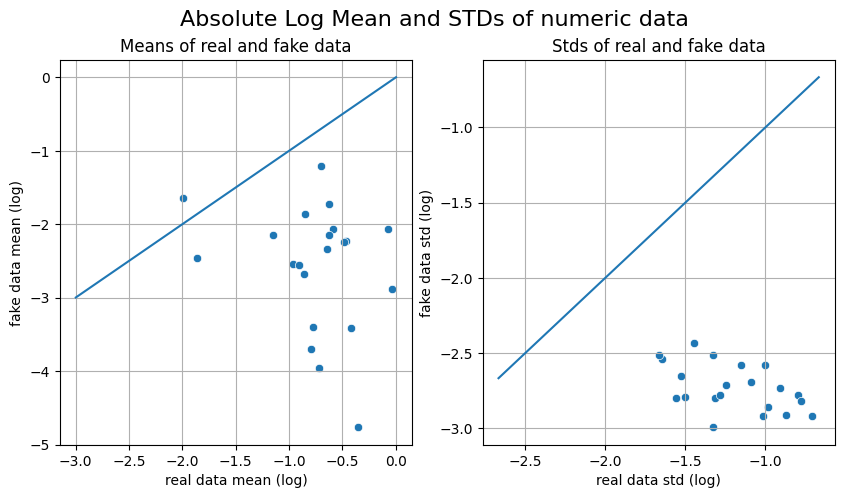

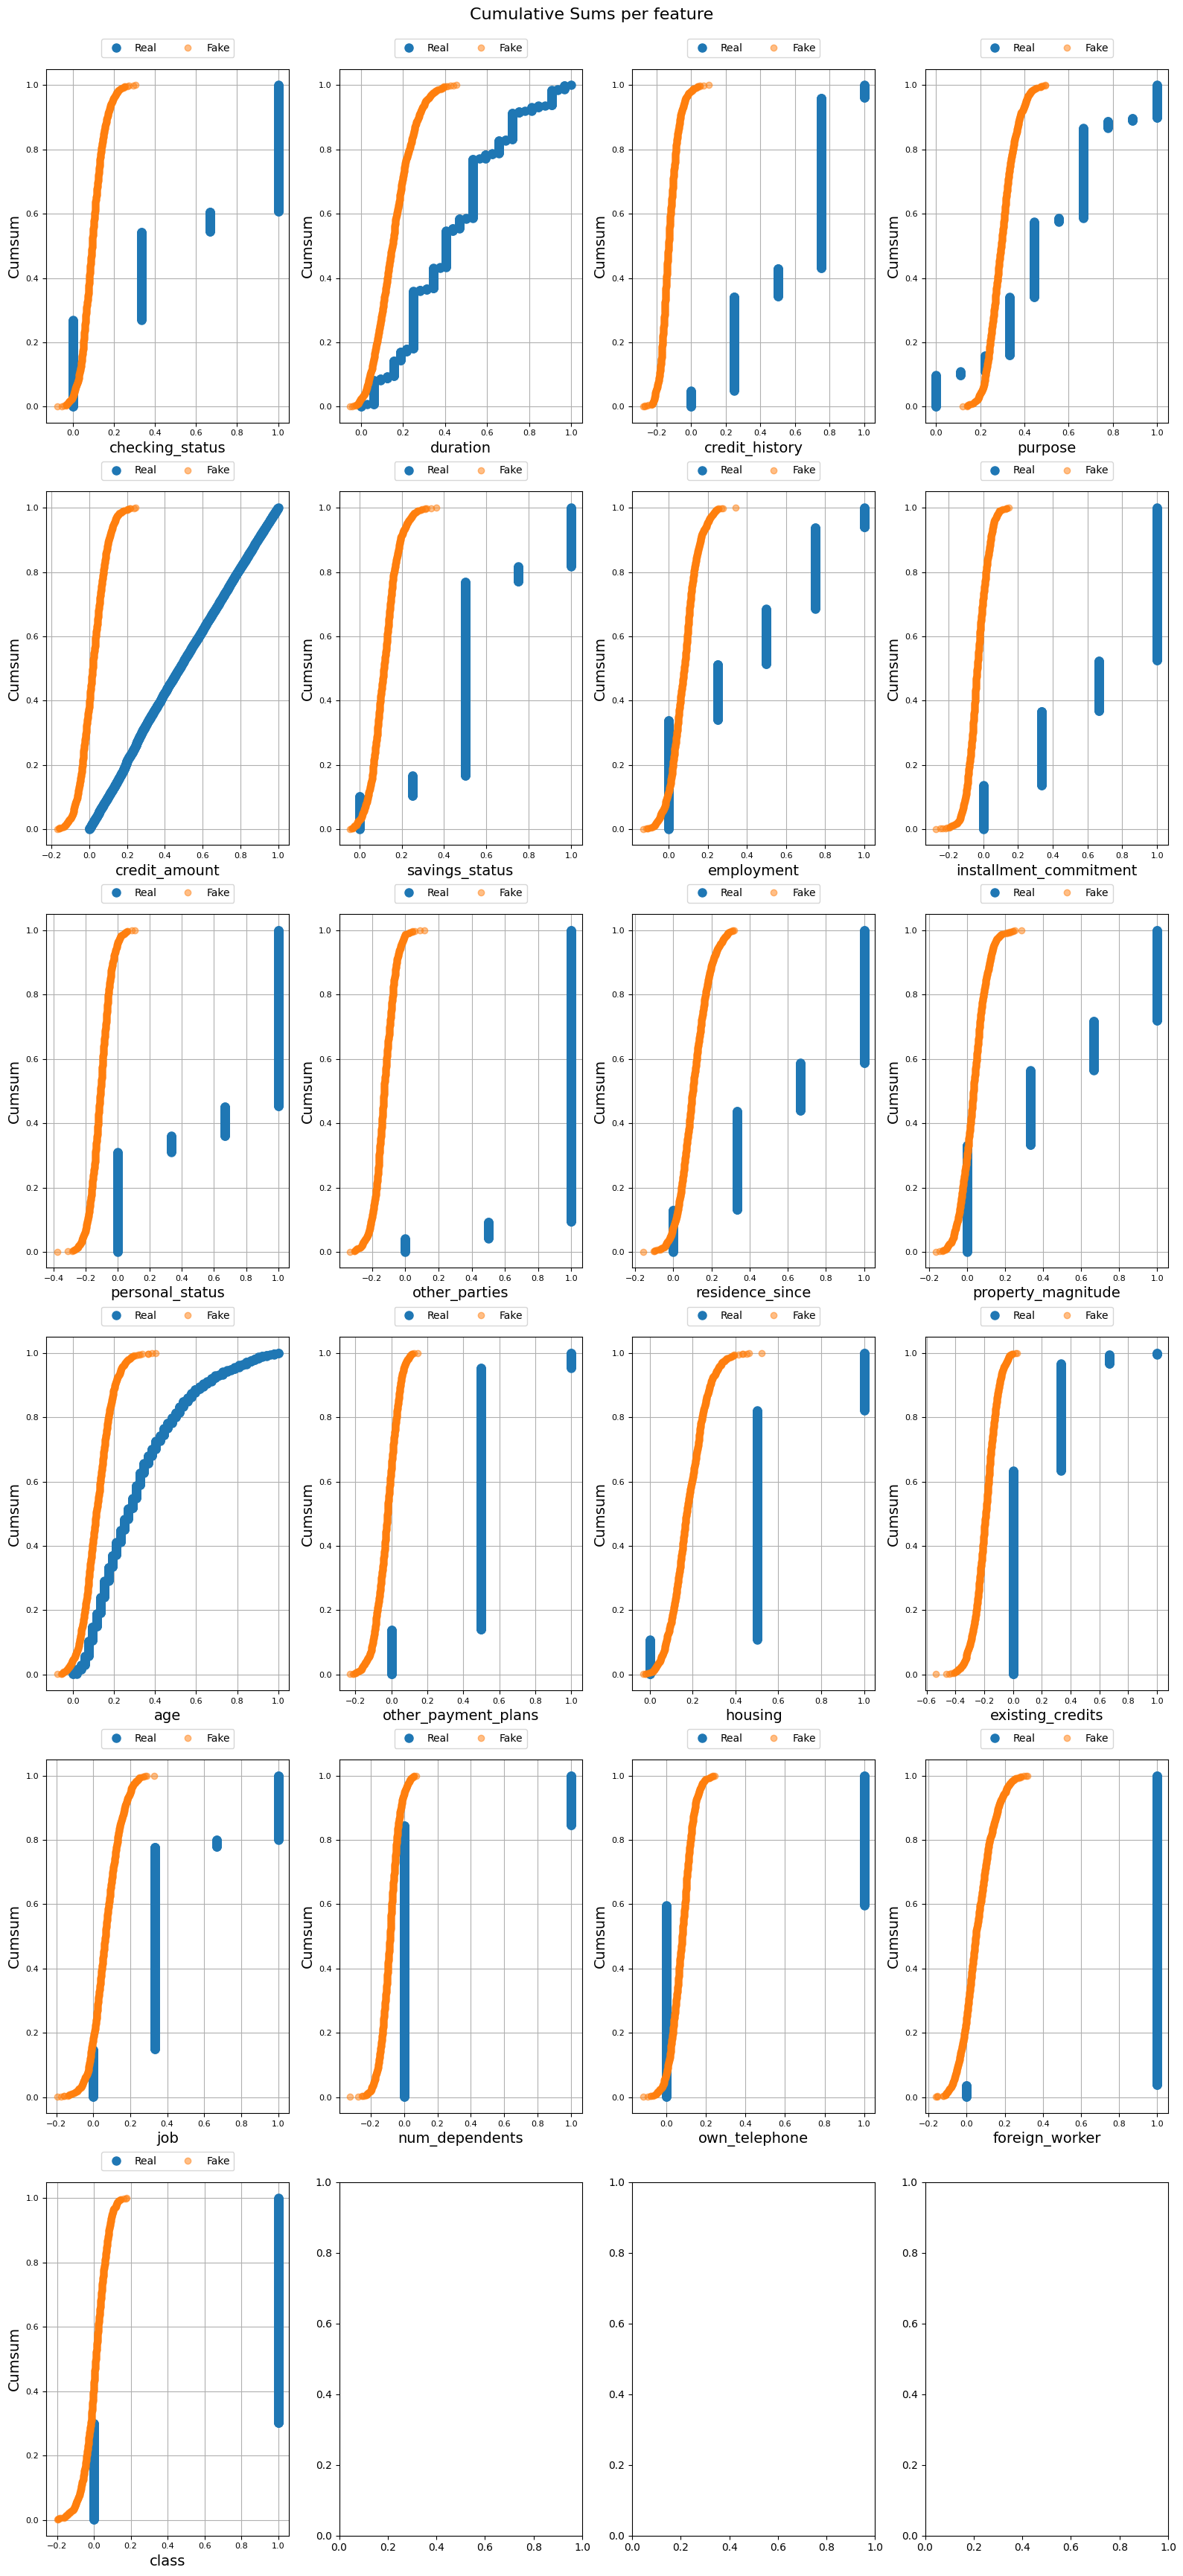

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

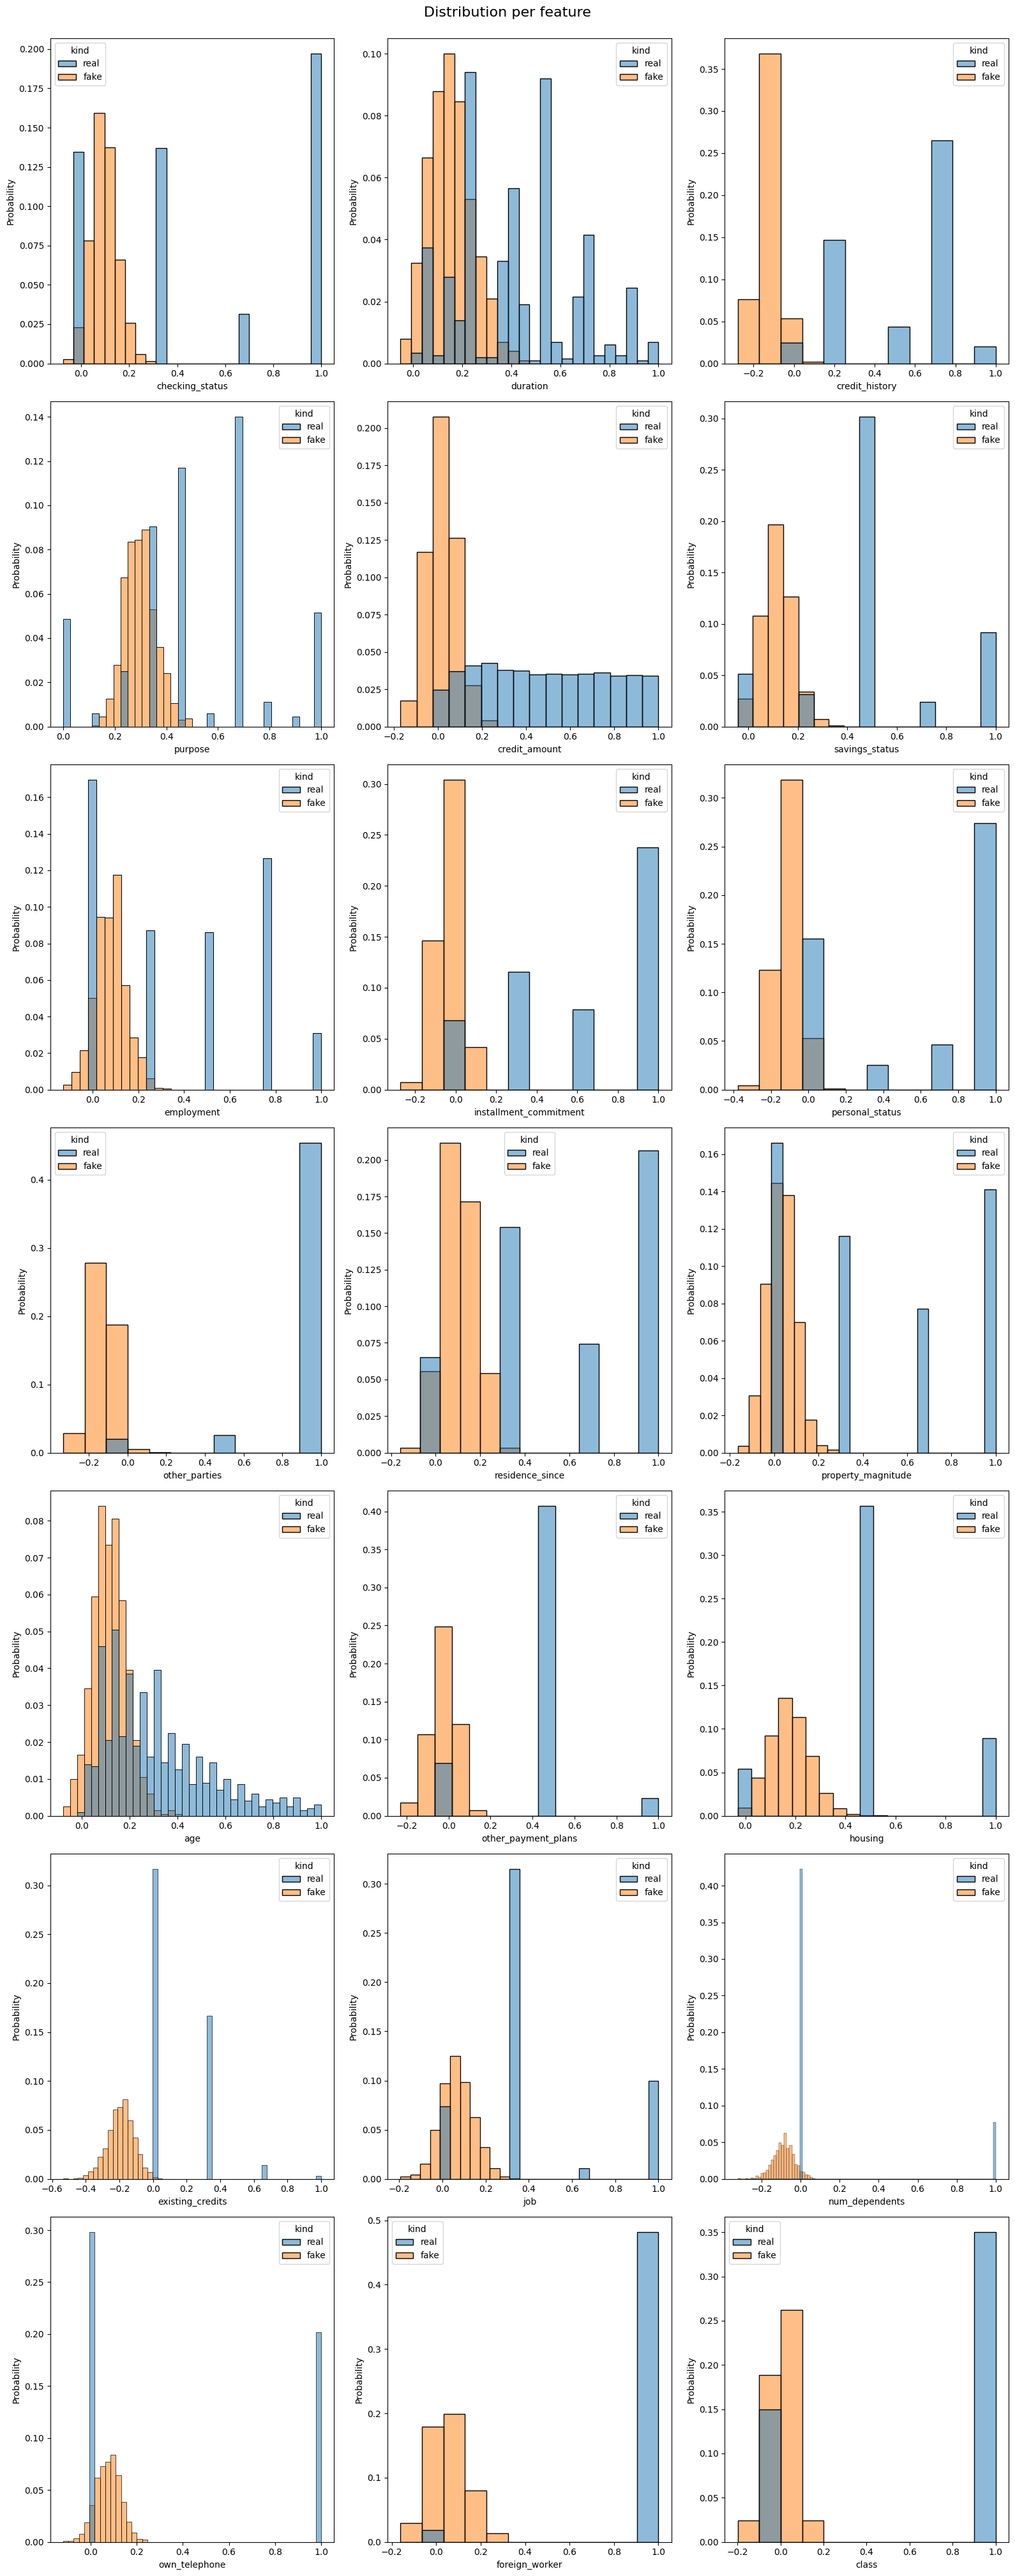

TypeError: Image data of dtype object cannot be converted to float

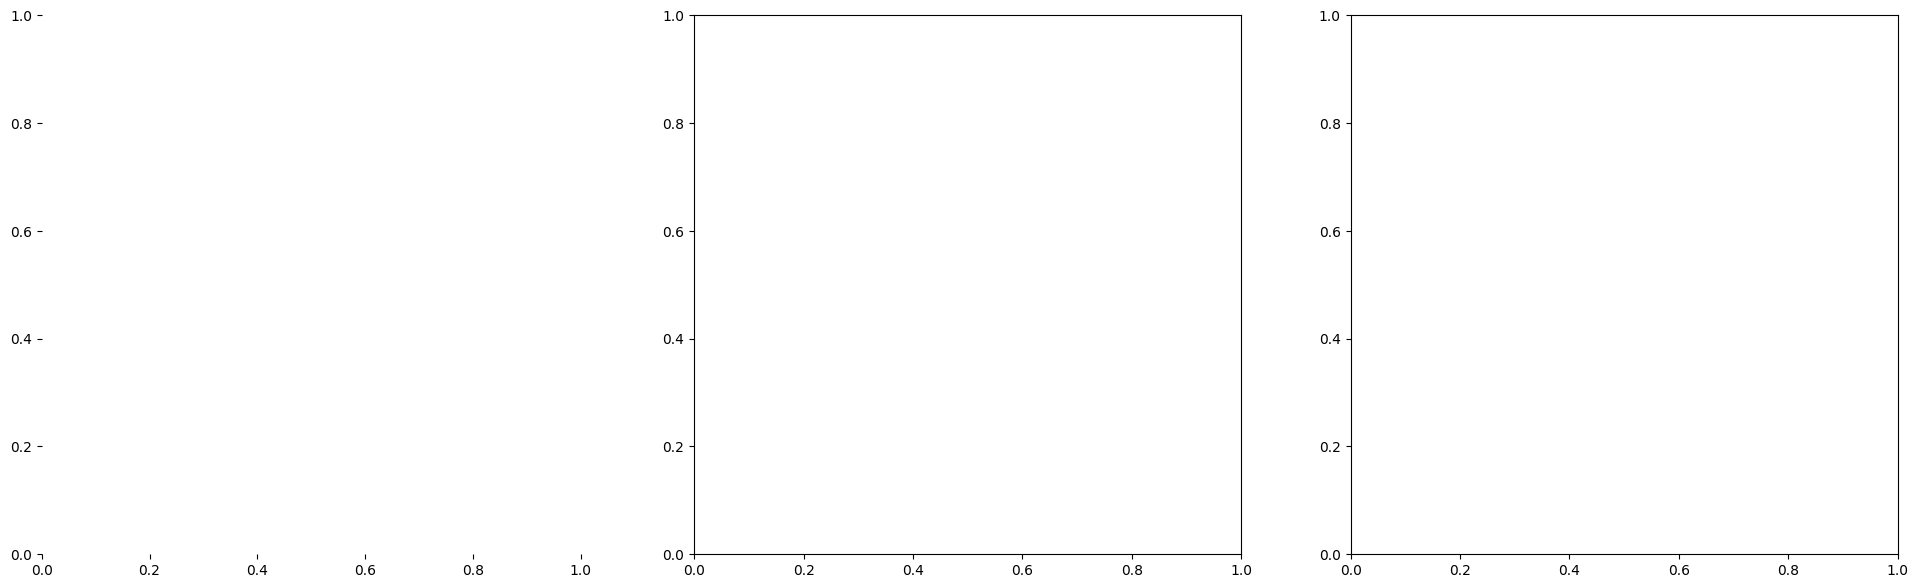

In [20]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(data, df_synthetic )
table_evaluator.visual_evaluation()